# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
#url = "https://api.openweathermap.org/data/3.0/onecall?lat={lat}&lon={lon}&exclude={part}&appid={e1bf52191a39c2ffad7a25fcaf9aa8ac}"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

3# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    



    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
       
        city_weather = requests.get(city_url).json()

    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})


        # pause to avoid rate limiting
        time.sleep(1)
        
       # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

            

#Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(city_data)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | praia
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | karasburg
Processing Record 8 of Set 1 | lompoc
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | st. john's
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | hadibu
Processing Record 14 of Set 1 | turaif
Processing Record 15 of Set 1 | susuman
Processing Record 16 of Set 1 | trabzon
Processing Record 17 of Set 1 | atafu village
Processing Record 18 of Set 1 | gebeit
Processing Record 19 of Set 1 | praia da vitoria
Processing Record 20 of Set 1 | isafjordur
Processing Record 21 of Set 1 | cabedelo
Processing Record 22 of Set 1 | mana
Processing Record 23 of Set

In [8]:
print(city_data)

[{'City': 'thompson', 'Lat': 55.7435, 'Lng': -97.8558, 'Max Temp': 2.09, 'Humidity': 100, 'Cloudiness': 40, 'Wind Speed': 0, 'Country': 'CA', 'Date': 1728354323}, {'City': 'praia', 'Lat': 14.9215, 'Lng': -23.5087, 'Max Temp': 25.3, 'Humidity': 88, 'Cloudiness': 20, 'Wind Speed': 3.09, 'Country': 'CV', 'Date': 1728354346}, {'City': 'ushuaia', 'Lat': -54.8, 'Lng': -68.3, 'Max Temp': 5.81, 'Humidity': 87, 'Cloudiness': 0, 'Wind Speed': 2.57, 'Country': 'AR', 'Date': 1728354347}, {'City': 'port-aux-francais', 'Lat': -49.35, 'Lng': 70.2167, 'Max Temp': 2.77, 'Humidity': 71, 'Cloudiness': 25, 'Wind Speed': 10.45, 'Country': 'TF', 'Date': 1728354317}, {'City': 'blackmans bay', 'Lat': -43.0167, 'Lng': 147.3167, 'Max Temp': 10.41, 'Humidity': 71, 'Cloudiness': 99, 'Wind Speed': 0.89, 'Country': 'AU', 'Date': 1728354349}, {'City': 'waitangi', 'Lat': -43.9535, 'Lng': -176.5597, 'Max Temp': 11.57, 'Humidity': 98, 'Cloudiness': 51, 'Wind Speed': 5.36, 'Country': 'NZ', 'Date': 1728354350}, {'City': 

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,2.09,100,40,0.00,CA,1728354323
1,praia,14.9215,-23.5087,25.30,88,20,3.09,CV,1728354346
2,ushuaia,-54.8000,-68.3000,5.81,87,0,2.57,AR,1728354347
3,port-aux-francais,-49.3500,70.2167,2.77,71,25,10.45,TF,1728354317
4,blackmans bay,-43.0167,147.3167,10.41,71,99,0.89,AU,1728354349


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,2.09,100,40,0.00,CA,1728354323
1,praia,14.9215,-23.5087,25.30,88,20,3.09,CV,1728354346
2,ushuaia,-54.8000,-68.3000,5.81,87,0,2.57,AR,1728354347
3,port-aux-francais,-49.3500,70.2167,2.77,71,25,10.45,TF,1728354317
4,blackmans bay,-43.0167,147.3167,10.41,71,99,0.89,AU,1728354349


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

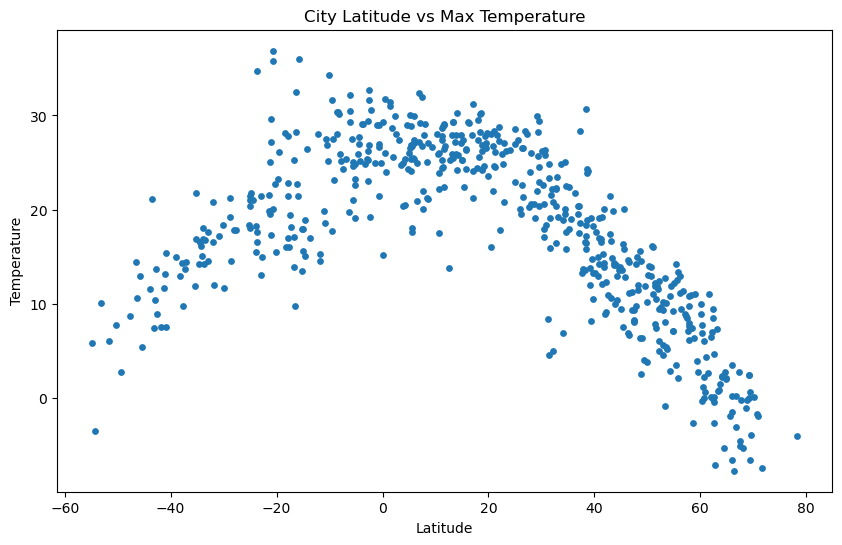

In [14]:
#lat_vs_temp = city_data_df.loc['latitude']['']
marker_size = 15
plt.figure(figsize=(10, 6))
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], s=marker_size)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('City Latitude vs Max Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

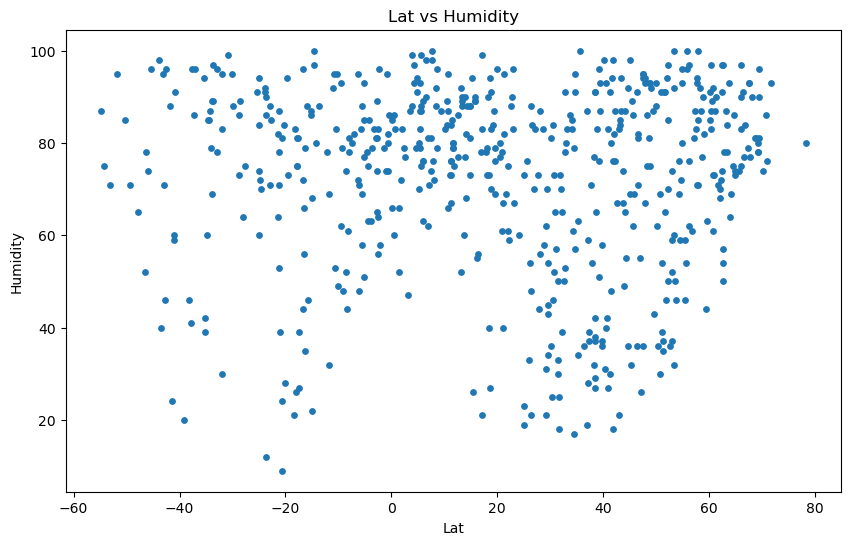

In [16]:
# Build the scatter plots for latitude vs. humidity
marker_size = 15
plt.figure(figsize = (10, 6))
# Incorporate the other graph properties
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], s = marker_size)
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.title('Lat vs Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

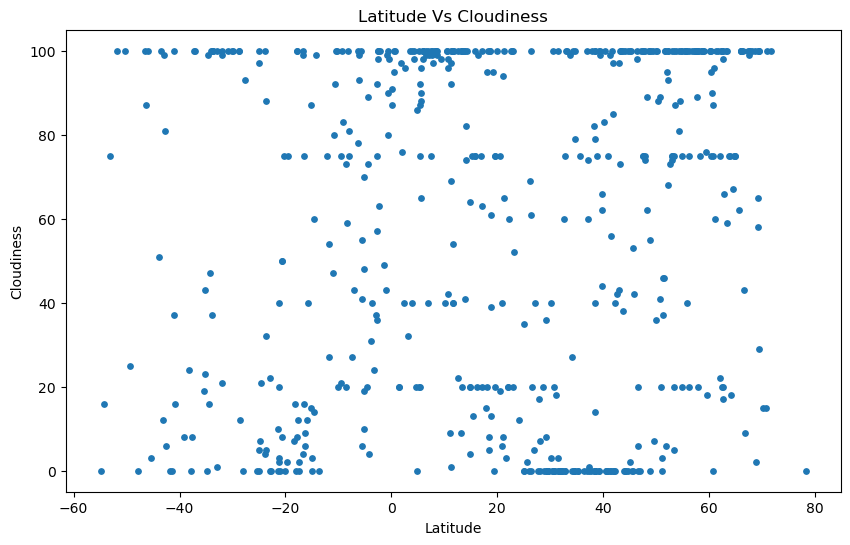

In [21]:
# Build the scatter plots for latitude vs. cloudiness
marker_size = 15
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], s = marker_size)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude Vs Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

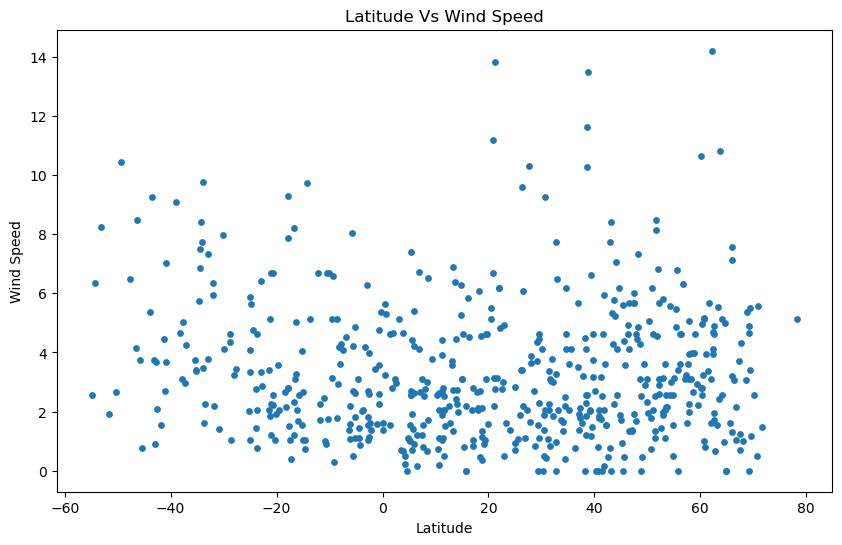

In [23]:
# Build the scatter plots for latitude vs. wind speed
marker_size = 15
plt.figure(figsize = (10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], s = marker_size)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude Vs Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, x_label, y_label, title):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)



In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,2.09,100,40,0.00,CA,1728354323
1,praia,14.9215,-23.5087,25.30,88,20,3.09,CV,1728354346
7,lompoc,34.6391,-120.4579,15.83,95,100,4.12,US,1728354353
9,st. john's,47.5649,-52.7093,9.28,94,75,5.66,CA,1728354355
12,hadibu,12.6500,54.0333,25.27,86,100,1.62,YE,1728354358


In [47]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ushuaia,-54.8000,-68.3000,5.81,87,0,2.57,AR,1728354347
3,port-aux-francais,-49.3500,70.2167,2.77,71,25,10.45,TF,1728354317
4,blackmans bay,-43.0167,147.3167,10.41,71,99,0.89,AU,1728354349
5,waitangi,-43.9535,-176.5597,11.57,98,51,5.36,NZ,1728354350
6,karasburg,-28.0167,18.7500,17.88,64,0,3.24,NaN,1728354351


###  Temperature vs. Latitude Linear Regression Plot

Text(0.5, 1.0, 'Max Temperature Vs Latitude')

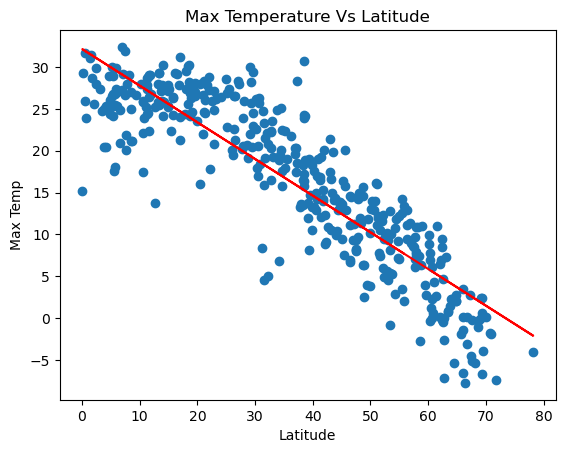

In [73]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = (x_values * slope + intercept)

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Max Temperature Vs Latitude')


Text(0.5, 1.0, 'Southern Max Temperature Vs Latitude')

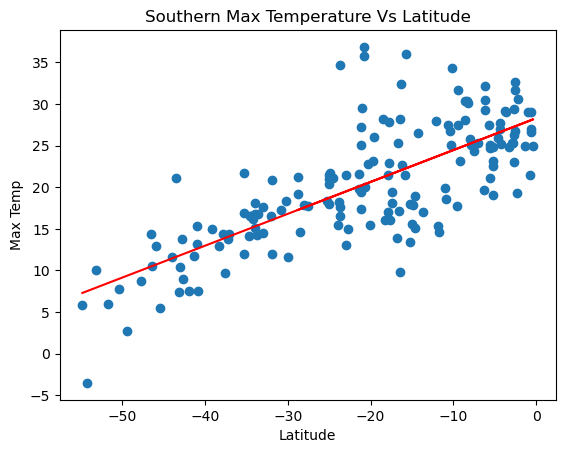

In [77]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = (x_values * slope + intercept)

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Max Temperature Vs Latitude')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

Text(0.5, 1.0, 'Northern Hummidity Vs Latitude')

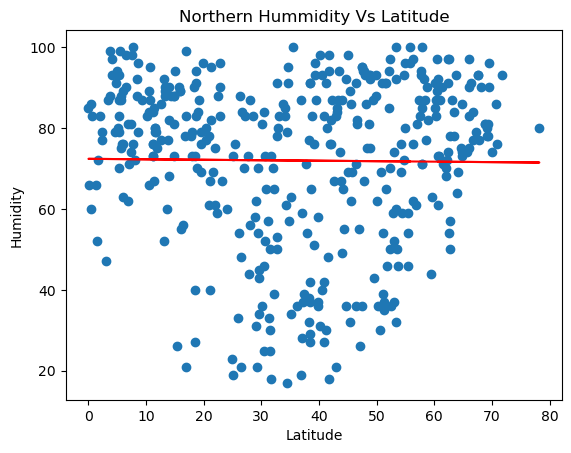

In [85]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = (x_values * slope + intercept)

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hummidity Vs Latitude')


Text(0.5, 1.0, 'Southern Humidity Vs Latitude')

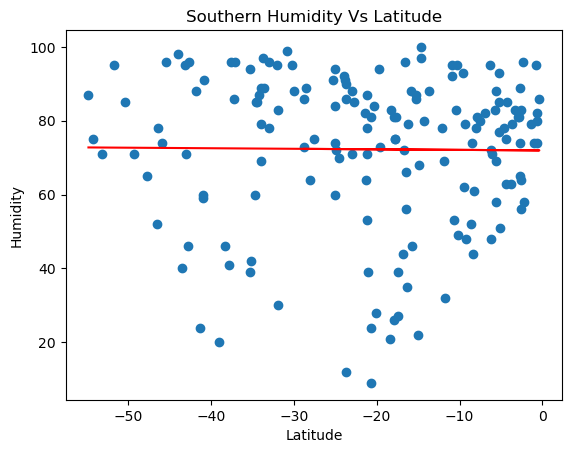

In [87]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = (x_values * slope + intercept)

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Humidity Vs Latitude')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Text(0.5, 1.0, 'Latitude Vs Humidity')

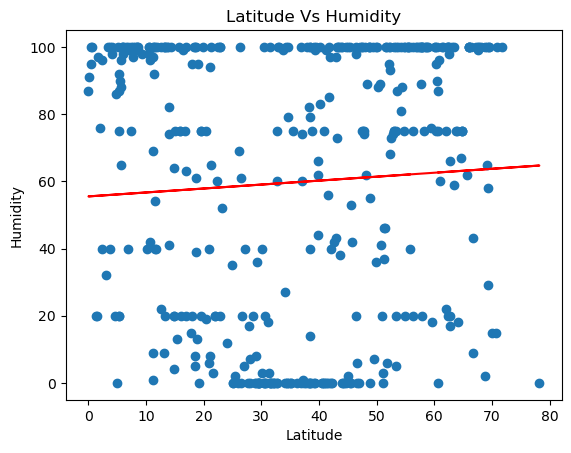

In [89]:
# Northern Hemisphere
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = (x_values * slope + intercept)

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Cloudiness Vs Latitude')

Text(0.5, 1.0, 'Southern Cloudiness Vs Latitude')

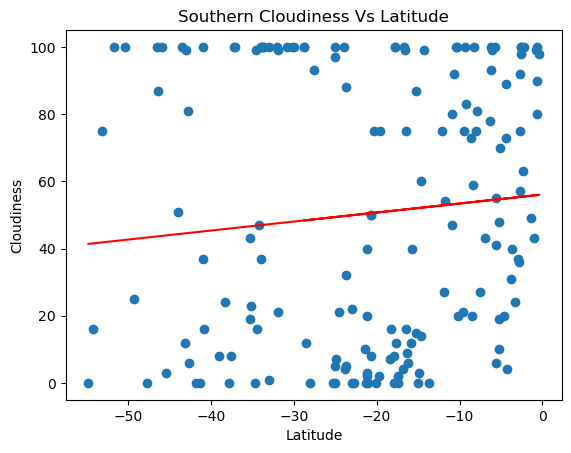

In [91]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = (x_values * slope + intercept)

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Cloudiness Vs Latitude')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Text(0.5, 1.0, 'Northern Wind Speed Vs Latitude')

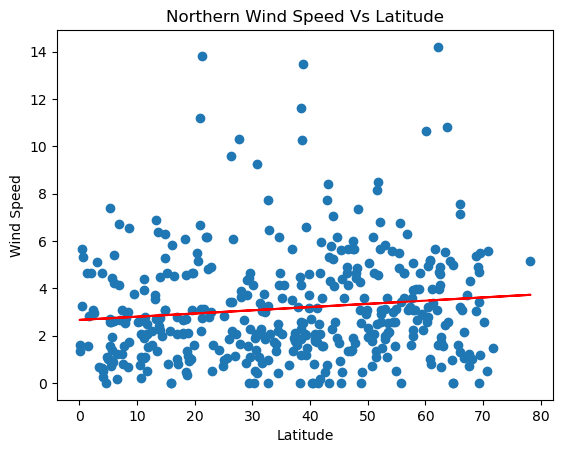

In [95]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = (x_values * slope + intercept)

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Wind Speed Vs Latitude')

Text(0.5, 1.0, 'Southern Wind Speed Vs Latitude')

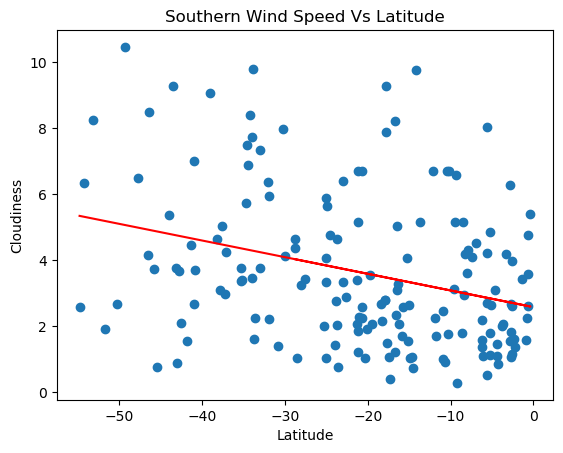

In [97]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = (x_values * slope + intercept)

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Wind Speed Vs Latitude')

**Discussion about the linear relationship:** YOUR RESPONSE HERE